# load dataset

In [1]:
import numpy as np
data = np.loadtxt('dataset_NVD.csv', delimiter=',')
print(data)

X = data[:, 1:]
y = data[:, 0]

print('X ~ n_samples x n_features:', X.shape)
print(79 * '_')
print('y ~ n_samples:', y.shape)
print(79 * '_')
print(y)


[[  0.   5.  21. ...,   0.   0.   0.]
 [  0.   5.   0. ...,   0.   0.   0.]
 [  0.   3.  92. ...,   0.   0.   0.]
 ..., 
 [  1.   4.  10. ...,   0.   0.   0.]
 [  1.   1.  15. ...,   0.   0.   1.]
 [  1.   1.  16. ...,   0.   0.   0.]]
X ~ n_samples x n_features: (4057, 126)
_______________________________________________________________________________
y ~ n_samples: (4057,)
_______________________________________________________________________________
[ 0.  0.  0. ...,  1.  1.  1.]


# Data for standardization

In [2]:
from sklearn.preprocessing import scale
X = scale(X)


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


# The data are divided into test data and training data
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4, random_state=0)


score 0.957486136784
train size: 2434
test size: 1623
SVM ______________________________


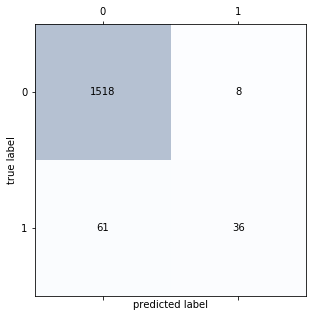

In [5]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

clf = SVC(kernel='rbf',gamma=0.001, C=100.0).fit(X_train, y_train)

print('score', clf.score(X_test, y_test))
print('train size:',len(X_train))
print('test size:',len(clf.predict(X_test)))

pre=clf.predict(X_test)

y_pred=clf.predict(X_test)

confmat_SVM = confusion_matrix(y_true=y_test, y_pred=y_pred)

print('SVM','_'*30)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat_SVM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_SVM.shape[0]):
    for j in range(confmat_SVM.shape[1]):
        ax.text(x=j, y=i,s=confmat_SVM[i, j],va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
